In [203]:
import numpy as np
from sklearn.model_selection import train_test_split

In [204]:
# Some global defs...
np.random.seed (42)
n = 100 # observations
variables = 5# x1 through x5
#
x1 = np.random.rand(n)
x2 = np.random.rand(n)
x3 = np.random.rand(n)
x4 = np.random.rand(n)
x5 = np.random.rand(n)

In [205]:
# Function we have to work with
def true_func(x1,x2,x3,x4,x5):
    return 1 + 2 * x1 - 3*x2

In [206]:
y = true_func(x1,x2,x3,x4,x5) + np.random.randn(n)

In [207]:
# Question 1.2 : write a function called reg_ridge..

In [208]:
# I need to create a single X matrix from the vectors X1..X5, let's write
# an handy helper function.
def mergeArray(*arrays):
    k = np.concatenate(arrays).reshape(5,n)
    return k.T;
        

In [209]:
def reg_ridge(X, y, l):
    #print( " X shape is (row, col) ", X.shape)
    #print( " X_t shape is (row, col) ", X.T.shape)
    matrix = X.T.dot(X)
    #print( " Xt*X shape is (row, col) ", matrix.shape)
    I      = np.identity(matrix.shape[0])  * l
    #print( " I shape is (row, col) ", I.shape)
    matrix2 = matrix + I
    #print( " matrix2 shape is (row, col) ", matrix2.shape)
    invMax  = np.linalg.inv(matrix2);
    #print( " invMax shape is (row, col) ", invMax.shape)
    result  = invMax.dot(X.T).dot(y)
    return result


In [210]:
X_input = mergeArray(x1,x2,x3,x4,x5)
#m, n    = X_input.shape
#print("m, n = ", m, n)

In [211]:
beta = reg_ridge(X_input, y, 1)

In [212]:
print (beta)

[ 3.01421087 -2.11963412  0.09564899 -0.31067582  0.21418983]


In [213]:
# Question Q.13: Use scikit learn train_test_split function

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X_input, y, test_size = 0.2)

In [215]:
# Question Q.14 : Calculate  betas for l = 0, 1, 10, 100

In [216]:
def calc_betas():
    betas = list()
    lambda_values = [0, 1, 10, 100]
    for l in lambda_values:
        betas.append(reg_ridge(X_train,y_train, l))
    return betas

In [217]:
print(calc_betas())

[array([ 3.33021742, -2.24940001,  0.21712298, -0.50193364,  0.07114856]), array([ 2.94390131, -1.98218336,  0.24693583, -0.48585157,  0.1223282 ]), array([ 1.49069104, -0.93153344,  0.26287476, -0.27256846,  0.19764355]), array([ 0.30096086, -0.10073553,  0.11355908,  0.00207181,  0.10419334])]


In [218]:
#Question Q.15

In [221]:
#First define a function to plot data given X and Y set.
def plot_dataset(X_data, y_data, lambdas):
    coefs = []
    for lamb in lambdas:
        coefs.append(reg_ridge(X_train, y_train, lamb))
    labels = ["$\\beta_0$","$\\beta_1$", "$\\beta_2$", "$\\beta_3$", "$\\beta_4$","$\\beta_5$"]
    lines  = plt.plot(lambda_values, coefs)
    plt.xlabel("$\\lambda$")
    plt.ylabel("$\\beta$")



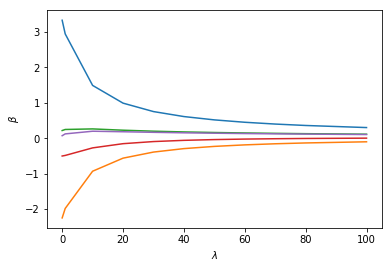

In [222]:
lambda_values = [0, 1, 10, 20, 30, 40, 50, 60, 70, 80, 100]
plot_dataset(X_train, y_train, lambda_values)

In [223]:
#Question Q.16 : using both training and test data

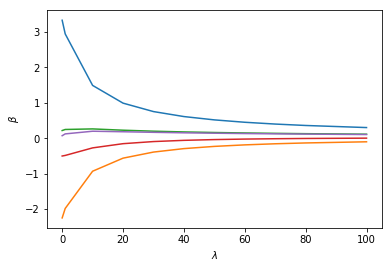

In [224]:
lambda_values = [0, 1, 10, 20, 30, 40, 50, 60, 70, 80, 100]
plot_dataset(X_input, y, lambda_values)